In [1]:
# NUMPY
import numpy as np
np.random.seed(3946)
# MATPLOTLIB
import matplotlib.pyplot as plt
plt.style.context('dark_background')
%matplotlib inline 
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (16, 6)}
plt.rcParams.update(params)

# SEABORN 
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

# SKLEARN 
from sklearn.metrics import pairwise_distances

# WARNINGS
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# TIME
from time import time 

# PATH 
import sys
path_files = '/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/code/'
sys.path.insert(0, path_files) 


# POT
import ot
from ot import sinkhorn, emd

# GREENKHORN 
from ot.bregman import greenkhorn

# SCREENKHORN
from new_formulation import Screenkhorn
# from screenkhorn.screenkhornBFGS import Screenkhorn

# WDA 
import wda_screen as wda_screen

ModuleNotFoundError: No module named 'autograd'

In [14]:
#%% parameters

n = 1000  # nb samples in source and target datasets
nz = 0.2

# generate circle dataset
t = np.random.rand(n) * 2 * np.pi
ys = np.floor((np.arange(n) * 1.0 / n * 3)) + 1
xs = np.concatenate(
    (np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
xs = xs * ys.reshape(-1, 1) + nz * np.random.randn(n, 2)

t = np.random.rand(n) * 2 * np.pi
yt = np.floor((np.arange(n) * 1.0 / n * 3)) + 1
xt = np.concatenate(
    (np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
xt = xt * yt.reshape(-1, 1) + nz * np.random.randn(n, 2)

nbnoise = 8

xs = np.hstack((xs, np.random.randn(n, nbnoise)))
xt = np.hstack((xt, np.random.randn(n, nbnoise)))

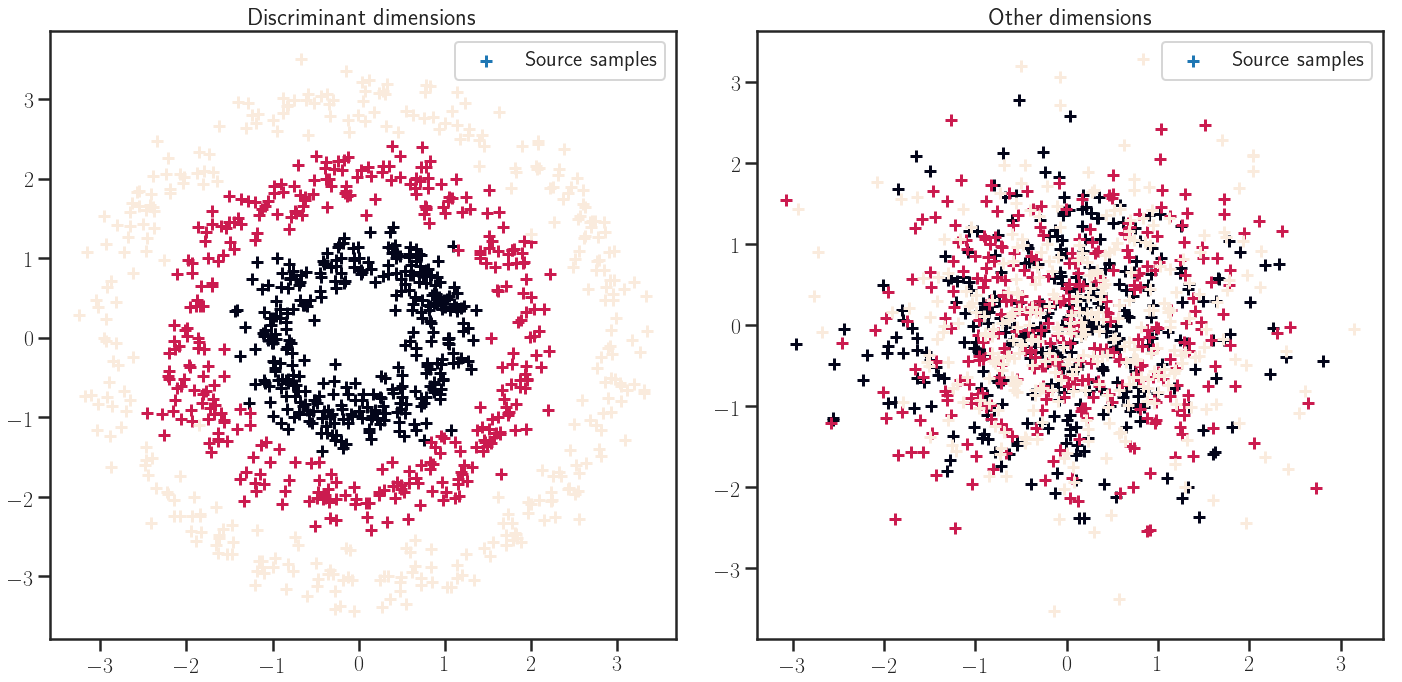

In [15]:
#%% plot samples
plt.figure(1, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(xt[:, 0], xt[:, 1], c=ys, marker='+', label='Source samples')
plt.legend(loc=0)
plt.title('Discriminant dimensions')

plt.subplot(1, 2, 2)
plt.scatter(xt[:, 2], xt[:, 3], c=ys, marker='+', label='Source samples')
plt.legend(loc=0)
plt.title('Other dimensions')
plt.tight_layout()

In [16]:
#%% Compute FDA
p = 2

Pfda, projfda = wda_screen.fda(xs, ys, p)

## Compute WDA with sinkhorn

In [17]:
#%% 
p = 2
reg = 1e0
k = 10
maxiter = 100

Pwda_sink, projwda_sink = wda_screen.wda_sinkhorn(xs, ys, p, reg, k, maxiter=maxiter)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+8.5789934287744929e-01	5.14376205e-01
    2	+4.6046716547275018e-01	2.57325996e-01
    3	+4.3523255017037699e-01	2.16974424e-01
    4	+3.7344362589984076e-01	2.46983033e-01
    5	+2.4760606956121115e-01	1.43090549e-01
    6	+2.3728004849388618e-01	1.06067861e-01
    7	+2.2843247528830363e-01	2.09229946e-02
    8	+2.2829638658297988e-01	1.60484682e-02
    9	+2.2816000287272267e-01	8.01778312e-03
   10	+2.2812644105886701e-01	4.08720360e-03
   11	+2.2811693492265181e-01	1.77327472e-03
   12	+2.2811474725950398e-01	1.42574979e-04
   13	+2.2811473363274426e-01	2.89144913e-05
   14	+2.2811473317070027e-01	1.32285539e-05
   15	+2.2811473314503961e-01	1.17594411e-05
   16	+2.2811473306965066e-01	5.51473378e-06
   17	+2.2811473306111155e-01	4.26554644e-06
   18	+2.2811473304989263e-01	1.46360075e-06
   19	+2.2811473304953847e-01	1.27877180e-06
   20	+2.2811473304856095e-01	4.86068190e-07


In [18]:
Pwda_sink, projwda_sink

(array([[-0.93283747,  0.35663528],
        [-0.35749406, -0.93273931],
        [ 0.00511557,  0.00407483],
        [-0.03281222,  0.01039209],
        [ 0.00144844, -0.02223009],
        [-0.02499597, -0.00310239],
        [-0.00626701, -0.02195684],
        [-0.00756145,  0.01743604],
        [ 0.01106712, -0.02477041],
        [-0.00797607,  0.02793854]]),
 <function wda_screen.wda_sinkhorn.<locals>.proj(X)>)

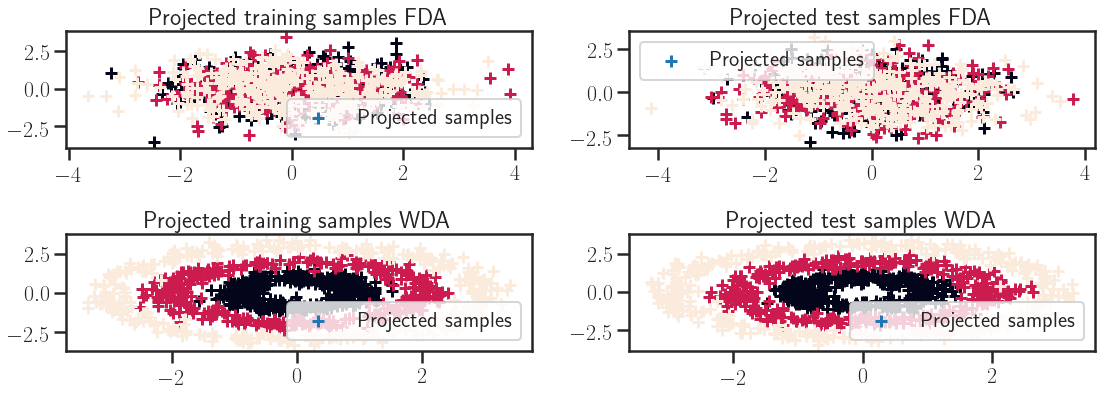

In [19]:
#%% plot samples

xsp = projfda(xs)
xtp = projfda(xt)

xspw = projwda_sink(xs)
xtpw = projwda_sink(xt)

plt.figure(2)

plt.subplot(2, 2, 1)
plt.scatter(xsp[:, 0], xsp[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected training samples FDA')

plt.subplot(2, 2, 2)
plt.scatter(xtp[:, 0], xtp[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected test samples FDA')

plt.subplot(2, 2, 3)
plt.scatter(xspw[:, 0], xspw[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected training samples WDA')

plt.subplot(2, 2, 4)
plt.scatter(xtpw[:, 0], xtpw[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected test samples WDA')
plt.tight_layout()


## Compute WDA with screenkhorn 

In [20]:
# |I_active| = CostMatrix.shape[0] / p_n
# |J_active| = CostMatrix.shape[1] / p_m
Pwda_screen, projwda_screen = \
wda_screen.wda_screenkhorn(xs, ys, p, reg, k, solver=None, maxiter=maxiter, p_n=30, p_m=30)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

    1	+8.0023603786069286e-01	1.53404295e-01
|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 2

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active|

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

    8	+8.6250712680469327e-02	2.37365495e-02
|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 11 	 |I_active| + |J_active| = 23

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 11 	 |I_active| + |J_active| = 23

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

   10	+8.6250625444578968e-02	2.37364995e-02
|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 11 	 |J_active| = 12 	 |I_active| + |J_active| = 23

|I_active| = 12 	 |J_active| = 

|I_active| = 11 	 |J_active| = 11 	 |I_active| + |J_active| = 22

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24

|I_active| = 12 	 |J_active| = 11 	 |I_active| + |J_active| = 23

|I_active| = 12 	 |J_active| = 12 	 |I_active| + |J_active| = 24



In [21]:
Pwda_screen, projwda_screen

((array([[-3.41465758e-01,  9.37814474e-01],
         [-9.37094305e-01, -3.39069285e-01],
         [ 6.47376351e-05, -4.03575367e-03],
         [-2.41838877e-02,  1.53209459e-02],
         [-2.92619191e-02, -3.77725594e-02],
         [-4.09441307e-02,  1.44635128e-02],
         [-2.96121594e-02, -1.36748874e-02],
         [ 1.79696769e-02,  1.37645704e-02],
         [-2.06303497e-02, -4.78407682e-02],
         [ 2.26374099e-02,  3.13663741e-02]]),
  {'solver': 'SteepestDescent',
   'stoppingcriteria': {'maxtime': 1000,
    'maxiter': 100,
    'mingradnorm': 1e-06,
    'minstepsize': 1e-10,
    'maxcostevals': 5000},
   'solverparams': {'linesearcher': <pymanopt.solvers.linesearch.LineSearchBackTracking at 0x11fe10dd8>},
   'stoppingreason': 'Terminated - min stepsize reached after 10 iterations, 2.04 seconds.',
   'final_values': {'x': array([[-3.41465758e-01,  9.37814474e-01],
           [-9.37094305e-01, -3.39069285e-01],
           [ 6.47376351e-05, -4.03575367e-03],
           [-2.

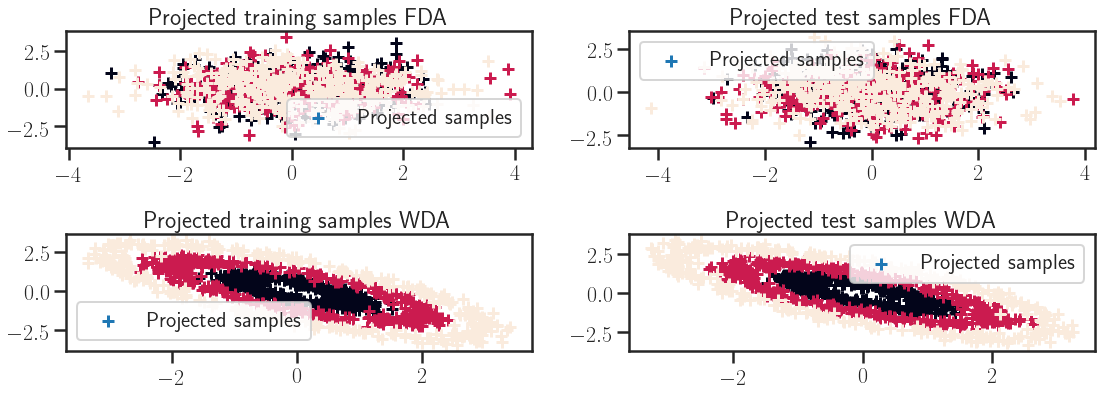

In [22]:
#%% plot samples

xsp = projfda(xs)
xtp = projfda(xt)

xspw_screen = projwda_screen(xs)
xtpw_screen = projwda_screen(xt)

plt.figure(2)

plt.subplot(2, 2, 1)
plt.scatter(xsp[:, 0], xsp[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected training samples FDA')

plt.subplot(2, 2, 2)
plt.scatter(xtp[:, 0], xtp[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected test samples FDA')

plt.subplot(2, 2, 3)
plt.scatter(xspw[:, 0], xspw_screen[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected training samples WDA')

plt.subplot(2, 2, 4)
plt.scatter(xtpw[:, 0], xtpw_screen[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected test samples WDA')
plt.tight_layout()